<div style="border:solid Chocolate 2px; padding: 40px">

<b> Лусине, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Загрузка и подготовка данных

In [2]:
#Устанавливаем нужные библиотеки, что бы импортировать функции
!pip install phik
!pip install shap
!pip install optuna
!pip install mlxtend
!pip install imbalanced-learn

In [3]:
#Испортипуем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
from mlxtend.plotting import plot_decision_regions
from itertools import combinations
from scipy import stats
from scipy.stats import spearmanr
import shap,sklearn
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import RandomOverSampler
from mlxtend.plotting import plot_decision_regions
from itertools import combinations
plt.rcParams["figure.figsize"] = (3,3)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали, данные загрузили.

In [4]:
#Загружаем данные
try:
    df_data_a = pd.read_csv('/datasets/geo_data_0.csv')
    df_data_b = pd.read_csv('/datasets/geo_data_1.csv')
    df_data_c = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_data_a = pd.read_csv('C:/Users/Admin/Downloads/geo_data_0.csv')
    df_data_b = pd.read_csv('C:/Users/Admin/Downloads/geo_data_1.csv')
    df_data_c = pd.read_csv('C:/Users/Admin/Downloads/geo_data_2.csv')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные загрузили - отлично!
    
Здорово, что ты используешь конструкцию ``try-except`` для путей файлов. Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    
Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

Изучаем загруженные файлы

In [5]:
#Изучаем загруженные файлы
display(df_data_a.sample(10))
print()
display(df_data_a.info(0))
print()
display(df_data_a.describe())

,id,f0,f1,f2,product
41530,DSca6,0.040381,-0.021830,-0.524200,174.190581
67592,ZmuK7,1.047144,-0.460769,0.999769,169.179461
75244,GX5ma,-0.025010,0.384114,4.175329,166.937162
15071,eT5LG,0.317136,0.017499,4.940073,133.191989
93827,MWOrA,-0.358552,0.805626,8.379895,94.128007
76639,Z4q6U,-0.663797,0.660507,-4.479374,33.002616
47813,YS8nJ,-0.554684,0.904680,1.991225,19.709704
11706,YYKaR,1.316616,-0.405877,4.155800,118.146755
77915,koNx1,0.785390,0.366994,-0.116896,32.520350
95901,V0fEI,1.125428,0.136285,3.032216,91.547366



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
#Проверяем пропуски
df_data_a.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
#Проверяем дубликаты
df_data_a['id'].duplicated().sum()

10

In [8]:
df_data_a[df_data_a['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [9]:
#Удаляем дубликаты
df_data_a.drop_duplicates(subset=['id'],inplace=True)

In [10]:
df_data_a['id'].duplicated().sum()

0

В датасете тип данных object и float. Пропусков нет. Есть дубликаты по id.Совподает только id но не данные, их не много, вот по этому удалила.

In [11]:
#Изучаем загруженные файлы
display(df_data_b.sample(10))
print()
display(df_data_b.info(0))
print()
display(df_data_b.describe())

,id,f0,f1,f2,product
19882,DNDYq,-5.292583,-4.057094,-0.001280,3.179103
72037,KNNed,15.475474,-10.261569,4.995649,134.766305
44166,GD6XF,-2.136636,-0.080720,0.997431,30.132364
88734,9g2jV,-15.963620,-3.184791,3.000841,84.038886
14691,XcPrP,12.657391,-9.686109,4.006355,107.813044
38800,QRK4y,-5.885520,-4.589534,4.000748,110.992147
81696,iqFMR,25.099315,-7.014882,1.998925,53.906522
10626,c8wEL,12.893184,1.828501,-0.002281,0.000000
15504,J1dt7,9.784935,2.187166,3.996915,107.813044
61181,hjDHh,-4.784756,-14.785539,4.000184,110.992147



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [12]:
#Проверяем пропуски
df_data_b.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
#Проверяем дубликаты
df_data_b['id'].duplicated().sum()

4

In [14]:
df_data_b[df_data_b['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [15]:
#Удаляем дубликаты и проверяем данные
df_data_b.drop_duplicates(subset=['id'],inplace=True)
df_data_b['id'].duplicated().sum()

0

Во втором датасете тип данных object и float. Пропусков нет. Есть дубликаты так же по id.Дубликаты удалила.

In [16]:
#Изучаем загруженные файлы
display(df_data_c.sample(10))
print()
display(df_data_c.info(0))
print()
display(df_data_c.describe())

,id,f0,f1,f2,product
41297,bARvd,-1.303508,0.828768,-2.492422,73.471011
99341,BRH7F,-0.238408,-0.696280,2.067976,83.179787
28245,jNdej,-1.216659,-1.878966,2.271903,53.666807
53438,LpAGk,-1.739163,0.125915,1.976818,53.697850
35007,UMJeT,-3.064818,-0.762888,1.967419,109.546022
90874,pTAHI,2.710374,-0.570630,-0.216957,33.262942
42500,oGDzg,3.679858,-3.011344,-1.014023,101.558245
7998,by4qi,-0.359314,3.261466,-1.280658,124.151283
24556,eAZqb,1.617165,-2.250514,2.781802,141.322857
23399,zv8le,-0.431511,2.532792,-2.276956,54.677918



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [17]:
#Проверяем пропуски
df_data_c.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [18]:
#Проверяем дубликаты
df_data_c['id'].duplicated().sum()

4

In [19]:
df_data_c[df_data_c['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [20]:
#Удаляем дубликаты и проверяем данные
df_data_c.drop_duplicates(subset=['id'],inplace=True)
df_data_c['id'].duplicated().sum()

0

Такая ситуация и с третим датасетом

### Вывод

Загрузила данные аномалии нет. Типы данных float и object. Пропусков не было. Были дубликаты по столбцу id во всех датасетах. Удалила эти дубликаты.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные осмотрели, проверили пропуски и дубликаты, нашли и удалили неявные дубликаты по `id` - отлично!

In [21]:
for dataset in [df_data_a,df_data_b,df_data_c]:
    print(dataset.duplicated().sum())

0
0
0


Общие дубликаты отсцтсвует. По скольку данные совподают только по id.Дубликаты состовляют малую часть данных. Думаю при удалении ничего критического не произайдёт.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Стоит также проверить общие дубликаты.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

### Исследовательский анализ данных

Удаляю 'id',он не понадобится во время МО.

In [22]:
df_data_a = df_data_a.drop(['id'], axis=1)
df_data_b = df_data_b.drop(['id'], axis=1)
df_data_c = df_data_c.drop(['id'], axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Верное решение, для моделирования этот признак не нужен.

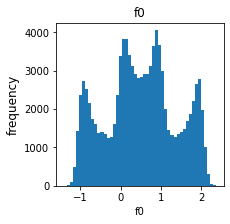

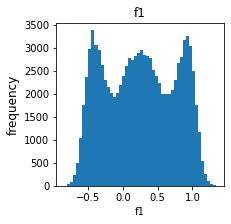

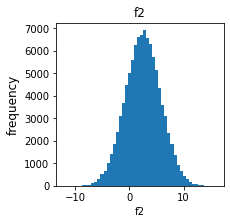

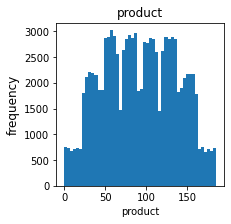

In [23]:
#Получаем графики по данным
for col in df_data_a.columns:
    plt.hist(df_data_a[col], bins=50)
    plt.ylabel('frequency', fontsize=12)
    plt.xlabel(col)
    plt.title(col, fontsize=12)
    plt.show()

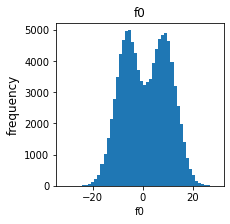

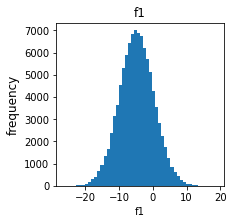

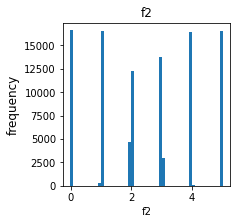

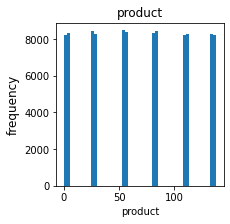

In [24]:
#Получаем графики по данным
for col in df_data_b.columns:
    plt.hist(df_data_b[col], bins=50)
    plt.ylabel('frequency', fontsize=12)
    plt.xlabel(col)
    plt.title(col, fontsize=12)
    plt.show()

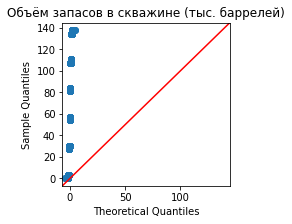

In [25]:
#Визуализируем признак 'объём запасов' по графику qqplot.
fig = sm.qqplot(df_data_b['product'], line='45')
plt.title('Объём запасов в скважине (тыс. баррелей)')
plt.show()

По графику тоже видим что распределение признака не нормальное.

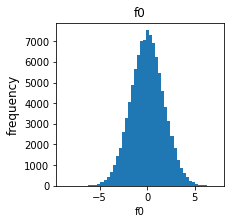

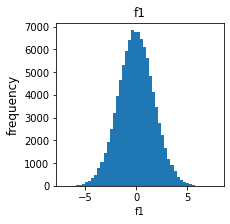

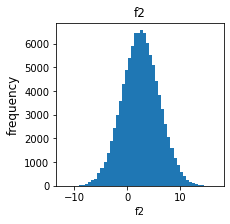

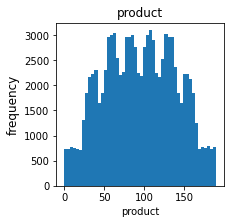

In [26]:
#Получаем графики по данным
for col in df_data_c.columns:
    plt.hist(df_data_c[col], bins=50)
    plt.ylabel('frequency', fontsize=12)
    plt.xlabel(col)
    plt.title(col, fontsize=12)
    plt.show()

### Вывод

В первом и третьем датасете распределение  признака "Объём запасов в скважине" близко к нормальному. Во втором датасете распределение не нормальное.С несколько пиками. Между этимим пиками ростояние стандартное 20 барелей. Может просто ввели ручным способом без расчётов.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Молодец, что анализируешь распределеение признаков в датасете - во втором регионе действительно есть аномальное поведение признаков.

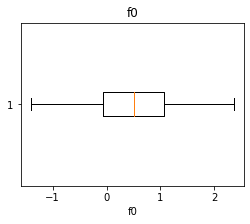

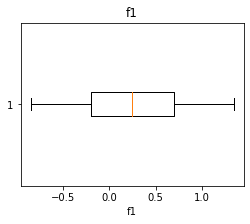

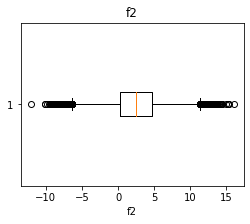

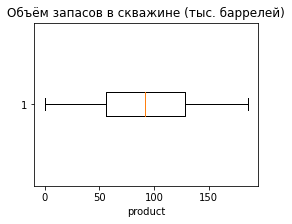

In [27]:
#Получаем график ящик с усами
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_a, x='f0',vert=False)
plt.title('f0')
plt.xlabel('f0')
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_a, x='f1',vert=False)
plt.title('f1')
plt.xlabel('f1')
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_a, x='f2',vert=False)
plt.title('f2')
plt.xlabel('f2')
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_a, x='product',vert=False)
plt.title('Объём запасов в скважине (тыс. баррелей)')
plt.xlabel('product')
plt.show()

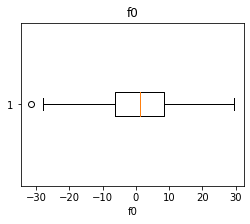

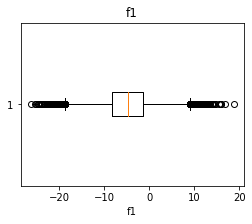

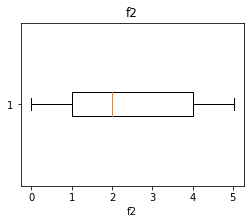

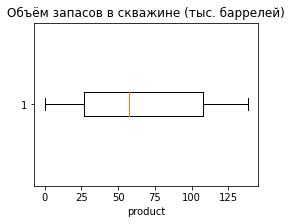

In [28]:
#Получаем график ящик с усами
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_b, x='f0',vert=False)
plt.title('f0')
plt.xlabel('f0')
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_b, x='f1',vert=False)
plt.title('f1')
plt.xlabel('f1')
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_b, x='f2',vert=False)
plt.title('f2')
plt.xlabel('f2')
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_b, x='product',vert=False)
plt.title('Объём запасов в скважине (тыс. баррелей)')
plt.xlabel('product')
plt.show()

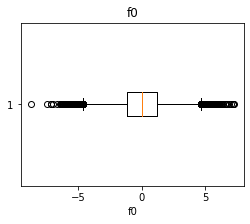

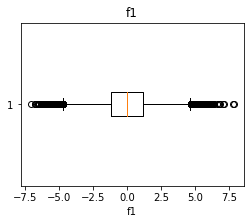

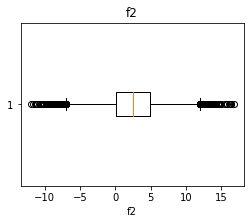

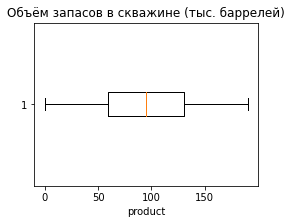

In [29]:
#Получаем график ящик с усами
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_c, x='f0',vert=False)
plt.title('f0')
plt.xlabel('f0')
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_c, x='f1',vert=False)
plt.title('f1')
plt.xlabel('f1')
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_c, x='f2',vert=False)
plt.title('f2')
plt.xlabel('f2')
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(data=df_data_c, x='product',vert=False)
plt.title('Объём запасов в скважине (тыс. баррелей)')
plt.xlabel('product')
plt.show()

### Вывод

Выбросы есть в признаках f0,f1,f2. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Выбросы исследованы - отлично!

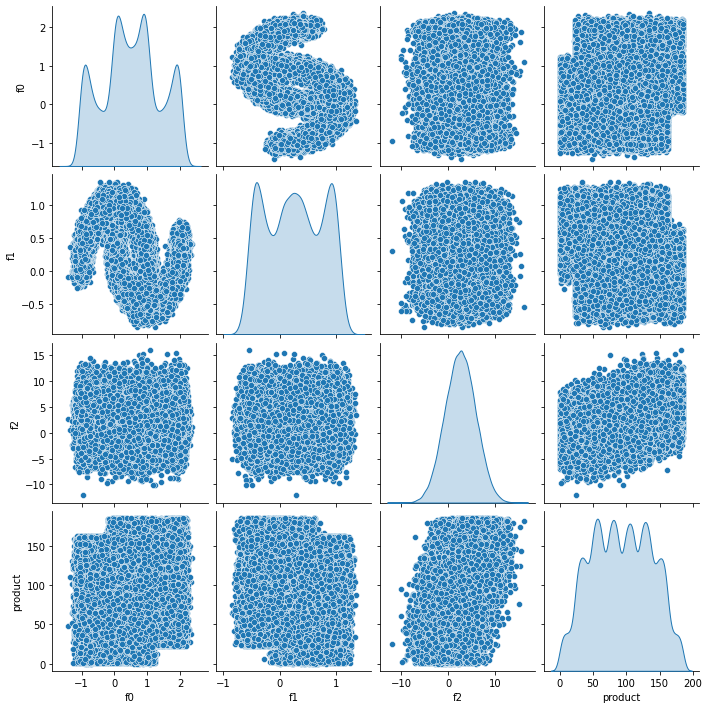

In [30]:
#Получаем кор.график по прзнакам
sns.pairplot(data=df_data_a, kind='scatter',diag_kind='kde');

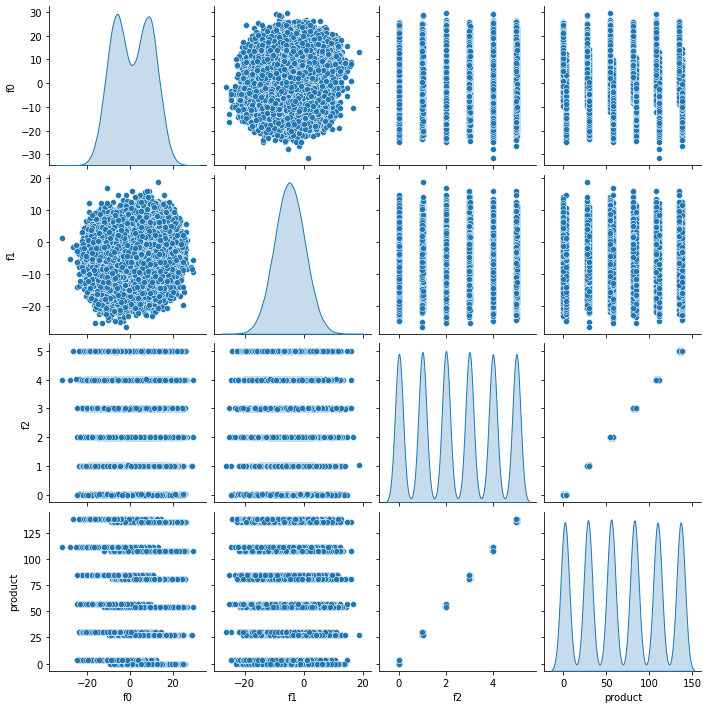

In [31]:
#Получаем кор.график по прзнакам
sns.pairplot(data=df_data_b, kind='scatter',diag_kind='kde');

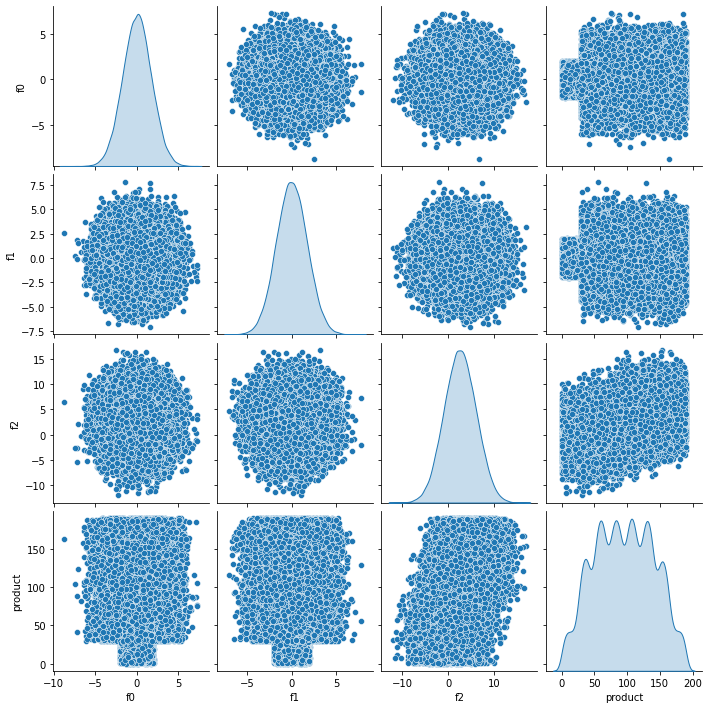

In [32]:
#Получаем кор.график по прзнакам
sns.pairplot(data=df_data_c, kind='scatter',diag_kind='kde');

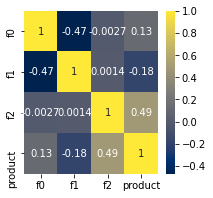

In [33]:
#Получаем кор.график по прзнакам
sns.heatmap(df_data_a.corr(method='spearman'),  annot=True, cmap='cividis');

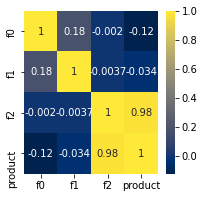

In [34]:
#Получаем кор.график по прзнакам
sns.heatmap(df_data_b.corr(method='spearman'),  annot=True, cmap='cividis');

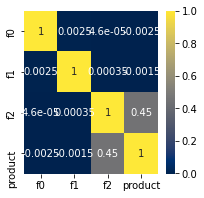

In [35]:
#Получаем кор.график по прзнакам
sns.heatmap(df_data_c.corr(method='spearman'),  annot=True, cmap='cividis');

### Вывод 
Шкала Чеддока

Слабая - 0.1–0.30.1–0.3 обратная (−0.1)–(−0.3)(−0.1)–(−0.3)

Умеренная - 0.3–0.50.3–0.5 обратная (−0.3)–(−0.5)(−0.3)–(−0.5)

Заметная - 0.5–0.70.5–0.7 обратная (−0.5)–(−0.7)(−0.5)–(−0.7)

Высокая - 0.7–0.90.7–0.9 обратная (−0.7)–(−0.9)(−0.7)–(−0.9)

Весьма высокая - 0.9–10.9–1 обратная (−0.9)–(−1)(−0.9)–(−1)

В первом и третьем датасете есть умеренная корреляция между признаками f2 и объёмом запасов в скважине.

Во втором датасете есть весьма высокая корреляция между признаками f2 и объёмом запасов в скважине.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Исследована корреляция и направления зависимости - отличная работа по исследлованию данных.

## Обучение и проверка модели

In [36]:
# создаём списки с названиями признаков
num_columns = ['f0', 'f1','f2']
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
                    [('num', MinMaxScaler(), num_columns)],
                      remainder='passthrough')

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([('preprocessor', data_preprocessor)
                       ,('models',LinearRegression())])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Молодец, что используешь масштабирование для линейной модели.

In [37]:
# словарь для моделей
param_grid = [{'models': [LinearRegression( )],
              'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]
param_grid

[{'models': [LinearRegression()],
  'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

In [38]:
#создаём константы RANDOM_STATE и делим даные
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [39]:
#Создаём функцию для сплита признаков,и обучения с помощью пайплайна
def prediction(data, target):
    features = data.drop([target] , axis=1)
    target = data[target]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=1515)
    
    model = pipe_final.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean= predicted_target.mean()
    real_prod_mean = target.mean()
    difference_mean = real_prod_mean - mean
    return data_frame, rmse, mean,real_prod_mean,difference_mean

In [40]:
#Получаем результаты первого региона
df_data_a_predicted, df_data_a_rmse, df_data_a_predicted_mean,df_data_a_real_prod_mean,df_data_a_difference_mean = prediction(df_data_a,
                                                                                                                              'product')
print(df_data_a_predicted.head())
print('RMSE -', df_data_a_rmse)
print('Средний запас запасанного сырья -', df_data_a_predicted_mean)
print('Средний реальный запас сырья', round(df_data_a_real_prod_mean.mean(),2))
print('Разница между реальным и предсказанным запасами сырья', round(df_data_a_difference_mean,2))

       real_product  predicted_product
34718     64.121219          89.887382
17180    136.445166         108.771380
85256     17.681403          49.249676
70891     70.192194          97.969806
34255     37.964107          86.493978
RMSE - 37.8153913995805
Средний запас запасанного сырья - 92.46574389339021
Средний реальный запас сырья 92.5
Разница между реальным и предсказанным запасами сырья 0.03


In [41]:
#Получаем результаты второго региона
df_data_b_predicted, df_data_b_rmse, df_data_b_predicted_mean,df_data_b_real_prod_mean,df_data_b_difference_mean = prediction(df_data_b,
                                                                                                                              'product')
print(df_data_b_predicted.head())
print('RMSE -', df_data_b_rmse)
print('Средний предсказанный запас -', df_data_b_predicted_mean)
print('Средний реальный запас сырья', round(df_data_b_real_prod_mean,2))
print('Разница между реальным и предсказанным запасами сырья', round(df_data_b_difference_mean,2))

       real_product  predicted_product
28046     30.132364          28.124688
13284     26.953261          26.134244
82794    137.945408         137.188487
36143     57.085625          55.594902
26449     53.906522          54.795437
RMSE - 0.8895967972254032
Средний предсказанный запас - 68.42480686261806
Средний реальный запас сырья 68.82
Разница между реальным и предсказанным запасами сырья 0.4


In [42]:
#Получаем результаты второго региона
df_data_c_predicted, df_data_c_rmse, df_data_c_predicted_mean,df_data_c_real_prod_mean,df_data_c_difference_mean = prediction(df_data_c, 'product')
print(df_data_c_predicted.head())
print('RMSE -', df_data_c_rmse)
print('Средний предсказанный запас -', df_data_c_predicted_mean)
print('Средний реальный запас сырья', round(df_data_c_real_prod_mean,2))
print('Разница между реальным и предсказанным запасами сырья', round(df_data_c_difference_mean,2))

       real_product  predicted_product
28046     76.784452          89.237997
13284     65.377817          95.768682
82795     51.397509         115.365399
36143    132.140507          96.265552
26449     31.069457          67.034064
RMSE - 40.0979727675409
Средний предсказанный запас - 95.12087569784154
Средний реальный запас сырья 95.0
Разница между реальным и предсказанным запасами сырья -0.12


### Вывод

Самая лучшая оцена RMSE получилось на втором датасете - 0.89.Средний запас сырья лучше предсказано на третьем датасете разница 0.06. Так понимаю во втором датасете из за того,что целевой признак был записан не по реальными данными а вручную как я написала, скорее всего данные были взяты из другого источника.Из за этого и показывает такую заниженную оценку RMSE.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Для каждого региона обучили модель, сделали предсказания, оценили их качество и сохранили их для дальнейшей работы.
    
Круто, что модельый процесс организован в виде функции - так мы избегаем дублирования однотипных операций и повышаем эффективность нашего решения.

## Подготовка к расчёту прибыли

In [43]:
#Сохраняем все ключевые значения 
points = 500
best_points = 200
reg_budget = 10*(10**9)
profit_per_units = 450000

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Бизнес-параметры заданы в виде констант - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Пара рекомендаций по работе с константами: 
1. Хорошей практикой является объявление констант в начале проекта - для этих целей прекрасно подойдёт ячейка, следующая за ячейкой импорта библиотек. Ничего страшного, что по условиям проекта их нужно объявлять именно здесь - такой подход больше в духе работы над реальным проектом:)
2. Согласно стандарту написания кода PEP 8 константы стоит объявлять в верхнем регистре.
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*Спасибо за подсказу.)*
</div>

## Расчёт прибыли и рисков 

In [44]:
#Делаем расчёты по данными 
avg_points = reg_budget/best_points
avg_barr_points = avg_points/profit_per_units
avg_barr_reg = reg_budget/profit_per_units
print('Средний доход по точкам', avg_points)
print('Средний обьём по точкам', avg_barr_points)
print('Средний обьём по региону', avg_barr_reg)

Средний доход по точкам 50000000.0
Средний обьём по точкам 111.11111111111111
Средний обьём по региону 22222.222222222223


In [45]:
#Расчитываем фактические данные
print('Средний фактический запас-a',df_data_a['product'].mean())
print('Средний фактический запас-b',df_data_b['product'].mean())
print('Средний фактический запас-c',df_data_c['product'].mean())

Средний фактический запас-a 92.49968421774354
Средний фактический запас-b 68.82391591804064
Средний фактический запас-c 94.99834211933378


### Вывод

Выходит, что первый и третий регион ближе к среднему,что бы не было убытков. Но всё равно есть риск, по скольку запасы не дотягивают до 111.Но по скольку мы выбираем скважины из 25000 только 200 случайным образом, то в этой выборке можно получить как хорошие, так и плохие скважины.По этому мы сделаем бутстрапирование. По закону больших чисел каждый раз наше среднее значение выбронных выборок  приближается к истенному среднему значению основной выборки.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Оценили достаточный объём сырья для безубыточной разработки новой скважины и сравнили со средним запасом сырья в каждой скважине - отлично!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Вывод стоит расширить, обосновав применение машинного обучения - через сравнение среднего ожидаемого сырья в каждом регионе и необходимого запаса сырья в точке для выхода на безубыточную работу мы должны обосновать дальнейший процесс бутстрапирования.
    
Сравнивая текущие значения ожидаемого запаса сырья в точке и необходимый для безубыточной работы запас сырья, мы приходим к выводу, что ни в одном регионе его недостаточно. Возникает закономерный вопрос - зачем тогда дальше продолжать проект и к чему вообще это бутстрапирование непонятное?:) 
    
Важно понимать, что среднее ожидаемое значение сырья в точке по региона рассчитано на основе 25 000 точек, из которых мы можем разработать только 200 - само собой, что среди них могут оказать как плохие, так и хорошие скважины с точки зрения запаса в них продукта. 
    
Случайным образом отбирая точки и считая финансовый результат работы в них, мы можем оценить прибыль и риски работы в регионе - это и есть обоснование дальнейшей процедуры бутстрапирования, которое стоит отобразить в выводе.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

In [46]:
#Создаём функцию для расчётов
def risk_profit(target, probabilities, revenue, count): 
    probs_sorted = probabilities.sort_values(ascending=False) 
    selected = target[probs_sorted.index][:count]             
    return (profit_per_units * selected.sum() - reg_budget) / 1000000 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Есть функция для оценки прибыли.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Результат стоит перевести в миллионы или миллиарды для повышения его читабельности.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Учтено.

In [47]:
# Функция для применения техники Bootstrap с 1000 выборокам
region = 0
for data in [df_data_a, df_data_b, df_data_c]:
    features = data.drop(['product'], axis=1)  
    target = data['product']  

    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                                  target,
                                                                                  test_size=0.25,
                                                                                  random_state=RANDOM_STATE)

    model = pipe_final.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 
    
    predictions_valid = pd.Series(predictions_valid)                                                 
    target_valid = pd.Series(target_valid).reset_index(drop=True)

    state = np.random.RandomState(12345)
    
    values = []
    
    for i in range(1000):
        target_subsample = target_valid.sample(n=500, replace=True, random_state=state) 
        probs_subsample = predictions_valid[target_subsample.index]
        values.append(risk_profit(target_subsample, probs_subsample, profit_per_units, best_points))

    values = pd.Series(values)

    mean = values.mean()
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    risk = stats.percentileofscore(values, 0)
    
    print('Регион', region)
    print('Средняя выручка', round(mean, 3))
    print('Доверительный интервал: [', round(lower,3), ':', round(upper,3), ']')
    print('Риск ', round(risk,3), '%')
    
    region += 1

Регион 0
Средняя выручка 447.53
Доверительный интервал: [ -91.012 : 997.544 ]
Риск  5.3 %
Регион 1
Средняя выручка 491.069
Доверительный интервал: [ 95.229 : 960.072 ]
Риск  0.7 %
Регион 2
Средняя выручка 383.786
Доверительный интервал: [ -180.218 : 916.981 ]
Риск  7.8 %


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Оценили прибыль и риски для каждого региона.

### Вывод

Результаты показывают, что лучшый регион для выбора скважин это второй регион:
Регион 1
Средняя выручка 491.069
Доверительный интервал: [95.229 : 960.072]
Риск  0.7.
Плюс ко всему доверительный интервал тоже не больш
Но по поводу целевого признака во втором регионе, там распределение не нормальное. Нужно перепроверить эти данные. Думаю были какие то пробелы во время сбора информации в этом регион %)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Выбран регион для анализа - отличная работа! Молодец, что также отмечаешь ненадёжность результата, несмотря на его наличие:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Лусине, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.

Положительно хотел бы отметить автоматизацию вычислений для лучшего масштабирования процессов, хороший анализ данных, позволяющий оценить данные с разных сторон, а также корректный процесс оценки прибыли и рисков с помощью бутстрапирования - здорово, что удалось разаобратсья в этом непростом процессе и избежать наиболее частых ошибок, связанных, например, с синхронизацией индексов или оценки прибыли только по предсказаниям.
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: итоговый вывод по проекту.

Лусине, все замечания учтены - проект принят!
    
Спасибо за хорошую работу над проектом, желаю успехов в дальнейшем обучении:)